In [5]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

Library imports

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [7]:
print(tf.__version__)

2.20.0


Import Datas

In [8]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 148s 1us/step


In [9]:
print(type(cifar10_data))
print(len(cifar10_data))

<class 'tuple'>
2


Loading Dataset

In [10]:
(train_images, train_labels), (test_images, test_labels) = cifar10_data

In [11]:
print(train_images[0])
print(train_images[0].shape)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(32, 32, 3)


Labels

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Data Exploration

In [13]:
print('Train dataset length', len(train_images))
print('Test dataset length', len(test_images))

print('Train images shape', train_images.shape)
print('Test images shape', test_images.shape)

Train dataset length 50000
Test dataset length 10000
Train images shape (50000, 32, 32, 3)
Test images shape (10000, 32, 32, 3)


Data processing

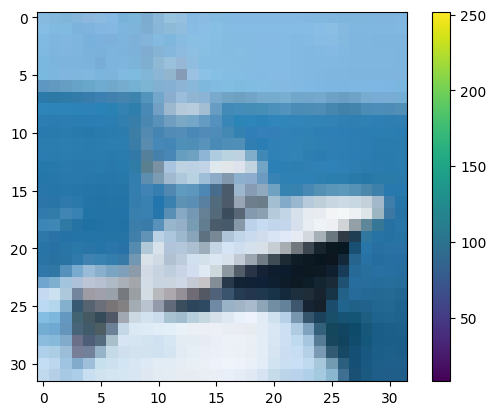

array([8], dtype=uint8)

In [14]:
index = 8
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.show()

train_labels[index]

Display 25 first images

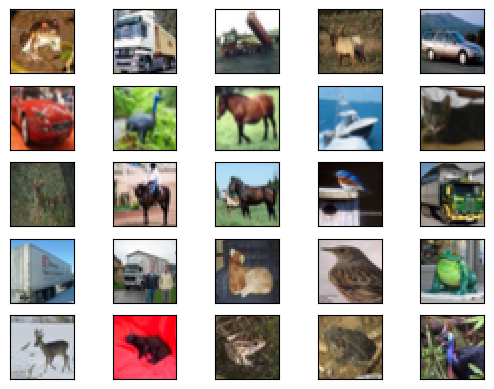

In [15]:
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])

Dataset noramalization

In [16]:
train_images = train_images / 255.0

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\jgoth\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compiler(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(train_images, train_labels, epochs=50)

AttributeError: 'Sequential' object has no attribute 'compiler'

Evaluate Accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.3717 - loss: 235.8929


Make Prediction

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(predictions[0],"\n",predictions[1],"\n",predictions[2])
print(np.argmax(predictions[0]))

[0.         0.         0.         0.         0.         0.99999994
 0.         0.         0.         0.        ] 
 [0.0000000e+00 6.2815558e-19 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999994e-01] 
 [2.4095198e-10 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.9081769e-15 9.9999994e-01]
5


Function to check labels

In [ ]:
def checking_labels(image_number):
  # Reset mtp subplot
  plt.clf()
  index = image_number
  plt.figure()
  plt.imshow(train_images[index])
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Vrai label :",class_names[train_labels[index][0]])
  print("Prediction :",class_names[np.argmax(predictions[index])])

<Figure size 640x480 with 0 Axes>

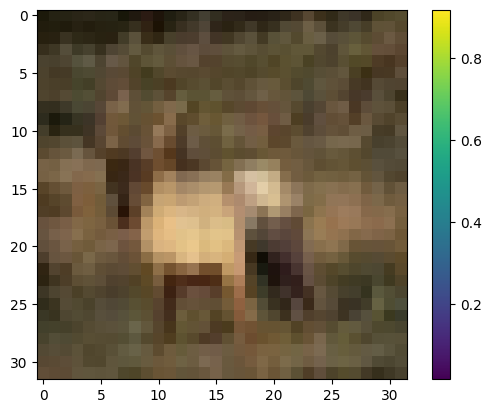

Vrai label : deer
Prediction : airplane


In [ ]:
checking_labels(3)

In [ ]:
def plot_image_prediction(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def display_predictions(images, labels, predictions, num_rows=5, num_cols=5):
  num_images = num_rows * num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image_prediction(i, predictions[i], labels, images)
  plt.tight_layout()
  plt.show()

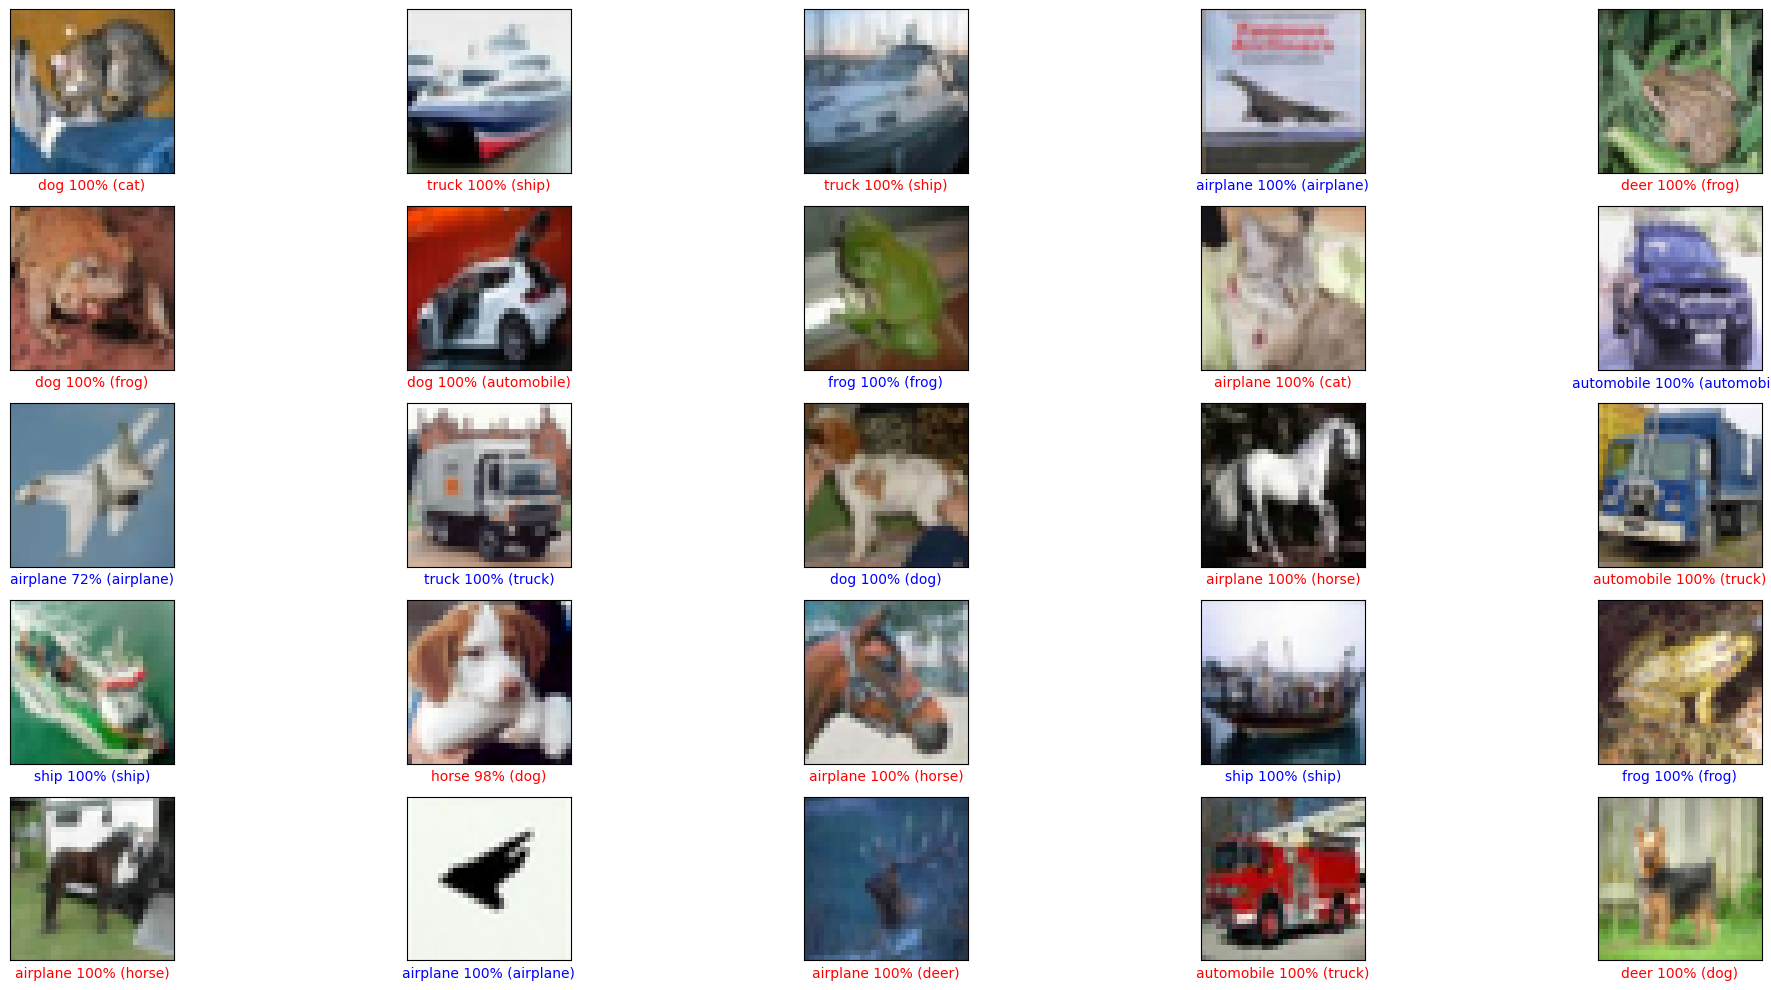

In [ ]:
display_predictions(test_images, test_labels, predictions)